# Social Graphs and Interactions: Assignment 02

**Date:** November 11, 2024

**Created by:**  
Johan Böcher Hanehøj (s194495), Melis Cemre Akyol (s232165), Md Jahidul Islam (s240010)


# Part 1: Genres and communities and plotting #

**Write about genres and modularity.**

Modularity, a measure of network community structure, is used to assess whether genre-based partitions represent meaningful groupings. High modularity would indicate that genres align well with densely connected artist communities, suggesting genres significantly shape artist connections. In contrast, low modularity implies weak or nonexistent genre-based communities, questioning the role of genre as a defining characteristic in this network.

**Detect the communities, discuss the value of modularity in comparison to the genres.**

In [ ]:
import networkx as nx
import json

# Load the existing Country Musician network genereated using wiki
G = nx.read_graphml(r"D:\DTU\2nd Sem\SGAI\country music graph\country_musician_graph.graphml")

*loaded the country musician graph.graphml that was done extracting list of country music performers from Wikipedia*

In [5]:
import ast
import requests

#Load the Artist-Genre Data
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/refs/heads/main/files/artists_genres_dictionary.txt"
response = requests.get(url)
artist_genres_data = ast.literal_eval(response.text)

# Prepare a dictionary to map each artist to their primary genre
artist_genres = {
    artist.replace(' ', '_'): genres[0]
    for artist, genres in artist_genres_data.items() if genres
}

# Step 3: Build the Community Dictionary and Remove Unlabeled Nodes
community_dict = {node: artist_genres.get(node) for node in G.nodes()}
nodes_without_genre = [node for node, genre in community_dict.items() if genre is None]

# Remove nodes without assigned genres and update the community dictionary
G.remove_nodes_from(nodes_without_genre)
community_dict = {node: genre for node, genre in community_dict.items() if genre is not None}

# Calculate node degrees and total edge count for modularity calculation
node_degrees = dict(G.degree())
total_edges = G.number_of_edges()
print(f"Total number of edges in the network: {total_edges}")

# Step 4: Calculate Modularity
modularity = 0.0

for u, v in G.edges():
    degree_u = node_degrees[u]
    degree_v = node_degrees[v]
    same_community = 1 if community_dict[u] == community_dict[v] else 0
    modularity += (1 - (degree_u * degree_v) / (2 * total_edges)) * same_community

modularity /= (2 * total_edges)
print(f"The modularity M of the network partitioned by genres is: {modularity:.4f}")

# Step 5: Interpret the Modularity Value
if modularity > 0.3:
    print("Genres represent strong communities.")
elif modularity > 0:
    print("Genres represent weak communities.")
else:
    print("Genres do not represent good communities.")


Total number of edges in the network: 14383
The modularity M of the network partitioned by genres is: 0.2413
Genres represent weak communities.


In [48]:
from collections import defaultdict, Counter

# Create a dictionary to store genre counts per community
community_genres = defaultdict(lambda: defaultdict(int))
overall_genre_counts = Counter()  # To track genre counts across all communities
community_sizes = Counter()  # To track the size of each community

# Loop over all nodes to count genres within each community
for node, community in partition.items():
    genres = artist_genres.get(node, [])
    community_sizes[community] += 1  # Track the size of the community
    for genre in genres:
        community_genres[community][genre] += 1
        overall_genre_counts[genre] += 1  # Track genre counts across all communities

# Sort communities by size in descending order
sorted_communities = community_sizes.most_common()

# Print out the top 5 genres for each community, sorted by size
print("\n" + "=" * 50)
print(f"{'Community Genre Distribution':^50}")
print("=" * 50)

for community, size in sorted_communities:
    print(f"\nCommunity {community} (Size: {size} artists):")
    
    # Sort genres by count in descending order for this community
    genre_counts = community_genres[community]
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Print only the top 5 genres (or fewer if less than 5)
    top_genres = sorted_genres[:5]
    
    for genre, count in top_genres:
        print(f"  - {genre}: {count} artists")

    # If more genres are present, indicate that there are additional genres
    if len(sorted_genres) > 5:
        print(f"  ...and {len(sorted_genres) - 5} more genres")
    
print("\n" + "=" * 50)
print(f"{'Communities Sorted by Size':^50}")
print("=" * 50)

for comm, size in sorted_communities:
    print(f"Community {comm}: {size} artists")

# Step to print the overall top 10 genres across all communities
print("\n" + "=" * 50)
print(f"{'Top 15 Genres Across All Communities':^50}")
print("=" * 50)

sorted_overall_genres = overall_genre_counts.most_common(15)

for genre, count in sorted_overall_genres:
    print(f"{genre}: {count} artists")

print("=" * 50)



           Community Genre Distribution           

Community 3 (Size: 473 artists):
  - country: 433 artists
  - bluegrass: 26 artists
  - country rock: 24 artists
  - country pop: 20 artists
  - pop: 18 artists
  ...and 72 more genres

Community 1 (Size: 456 artists):
  - country: 379 artists
  - country pop: 68 artists
  - country rock: 52 artists
  - pop: 52 artists
  - rock: 24 artists
  ...and 97 more genres

Community 0 (Size: 432 artists):
  - country: 372 artists
  - rockabilly: 63 artists
  - gospel: 62 artists
  - pop: 48 artists
  - rock and roll: 39 artists
  ...and 116 more genres

Community 4 (Size: 397 artists):
  - country: 261 artists
  - folk: 127 artists
  - americana: 105 artists
  - bluegrass: 82 artists
  - country rock: 57 artists
  ...and 152 more genres

Community 2 (Size: 47 artists):
  - country: 30 artists
  - country rock: 11 artists
  - southern rock: 10 artists
  - red dirt: 9 artists
  - americana: 7 artists
  ...and 18 more genres

Community 5 (Size: 

**Calculate the matrix D  and discuss your findings.**

In [52]:
import numpy as np
from collections import Counter, defaultdict

# Step 1: Find the 7 most common genres
all_genres = []
for genres in artist_genres.values():
    all_genres.extend(genres)  # Combine all genres from all artists

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Get the 7 most common genres
most_common_genres = [genre for genre, count in genre_counts.most_common(7)]

# Step 2: Find the 7 most common communities
community_counts = Counter(partition.values())

# Get the 7 largest communities
most_common_communities = [community_id for community_id, count in community_counts.most_common(7)]

# Step 3: Create the confusion matrix D (7x7)
D = np.zeros((7, 7), dtype=int)  # Initialize a 7x7 matrix

# Step 4: Fill the confusion matrix
# Loop over all nodes and check if they belong to the top genres and top communities
for node, community in partition.items():
    genres = artist_genres.get(node, [])
    
    # Only consider nodes in one of the top 7 communities
    if community in most_common_communities:
        community_idx = most_common_communities.index(community)
        
        # Check each genre of the node
        for genre in genres:
            # Only consider genres in the top 7 most common genres
            if genre in most_common_genres:
                genre_idx = most_common_genres.index(genre)
                D[genre_idx, community_idx] += 1  # Increment the corresponding matrix entry

# Step 5: Print the confusion matrix D
print("Confusion Matrix (Genres vs Communities):")
print(D)

# Optionally: You can print the genres and communities for reference
print("\nTop 7 communities (confusion matrix):", most_common_communities)

# Compare with the lourvain sorted communities
print("\nTop 7 communities (louvain partitioning):",sorted_communities[:7])

Confusion Matrix (Genres vs Communities):
[[433 379 372 261  30  21   0]
 [  8   9  33 127   0   1   0]
 [ 24  52  23  57  11   3   0]
 [ 18  52  48  36   1   2   0]
 [ 11  14  18 105   7   1   0]
 [ 26   9   9  82   1   0   0]
 [ 17  24  17  53   2   3   0]]

Top 7 communities (confusion matrix): [3, 1, 0, 4, 2, 5]

Top 7 communities (louvain partitioning): [(3, 473), (1, 456), (0, 432), (4, 397), (2, 47), (5, 24)]


**Discussion about the findings** The confusion matrix reveals the distribution of country music performers across various genres and detected communities, highlighting that larger communities, such as 3 and 1, contain a diverse mix of genres, suggesting significant overlap and collaboration among artists. In contrast, smaller communities, like community 2, may represent niche genres, indicating potential areas for deeper exploration of genre evolution. These findings underscore the complexity of genre classification in contemporary music, where artists frequently navigate multiple genres.


**Plot the community and comment on your result**

100%|██████████| 2000/2000 [01:18<00:00, 25.61it/s]


BarnesHut Approximation  took  7.86  seconds
Repulsion forces  took  66.99  seconds
Gravitational forces  took  0.33  seconds
Attraction forces  took  0.36  seconds
AdjustSpeedAndApplyForces step  took  1.26  seconds


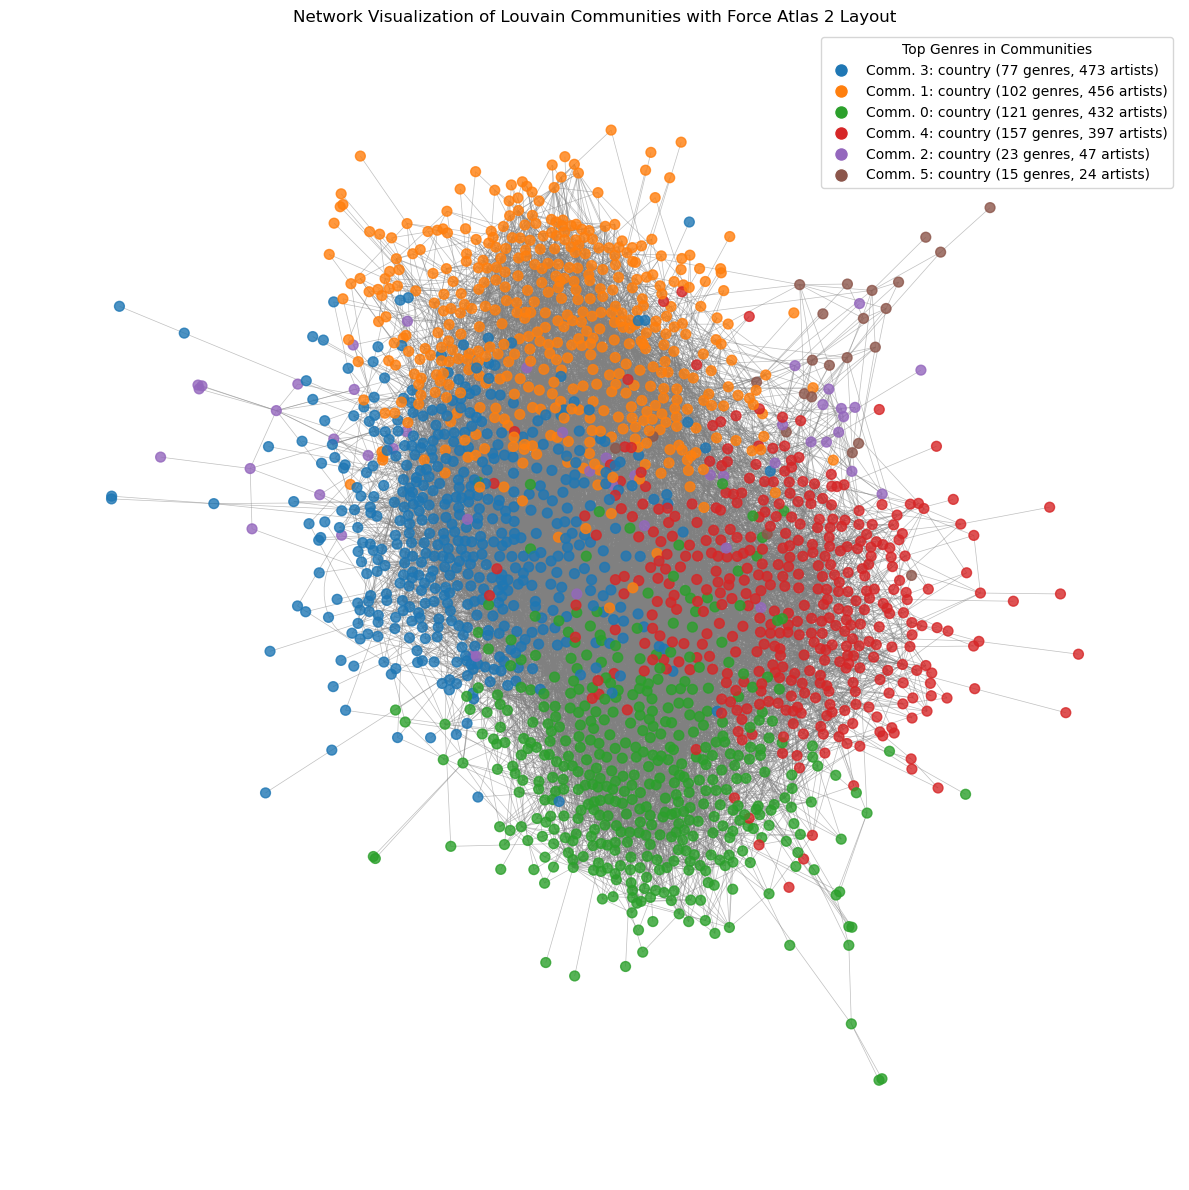

In [58]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import networkx as nx
from fa2_modified import ForceAtlas2

# Get the list of communities from the partition
community_ids = set(partition.values())

# Count the size of each community
community_sizes = Counter(partition.values())

# Sort the communities by size in descending order
sorted_communities = [community for community, size in community_sizes.most_common()]

# Create a dictionary to store genre counts per community
community_genres = defaultdict(lambda: defaultdict(int))

# Loop over all nodes to count genres within each community
for node, community in partition.items():
    genres = artist_genres.get(node, [])
    for genre in genres:
        community_genres[community][genre] += 1

# Create a dictionary to store the top genre and number of genres for each community
community_labels = {}

for community, genre_counts in community_genres.items():
    # Find the most frequent genre in the community
    top_genre = max(genre_counts, key=genre_counts.get)
    # Count the number of unique genres in the community
    num_genres = len(genre_counts)
    num_artists = community_sizes[community]

    if num_genres > 1:
        # Create a label in the format: "Top Genre (X genres)"
        community_labels[community] = f"Comm. {community}: {top_genre} ({num_genres} genres, {num_artists} artists)"
    else:
        community_labels[community] = f"Comm. {community}: {top_genre} ({num_genres} genre, {num_artists} artists)"

# Assign colors to communities based on sorted order (by size)
# Let's color only the top 10 largest communities
num_top_communities = 10
top_communities = sorted_communities[:num_top_communities]

# Use a color map that supports many colors
colors = plt.get_cmap('tab10')  # Supports up to 10 distinct colors
color_map = {community_id: colors(i) for i, community_id in enumerate(top_communities)}

# Assign a neutral color for the smaller communities
neutral_color = 'lightgray'

# Color nodes based on community
node_colors = []
for node in G.nodes():
    community_id = partition[node]
    if community_id in top_communities:
        node_colors.append(color_map[community_id])
    else:
        node_colors.append(neutral_color)  # Neutral color for smaller communities

# Compute the layout using Force Atlas 2
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT lin-lin mode
    adjustSizes=False,  # Prevent overlap (NOT)
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # Log
    verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

# Draw the network
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, positions, node_size=50, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, positions, edge_color='gray', alpha=0.5, width=0.5)
plt.axis("off")

# Add a legend with the top genres and number of genres per community
legend_labels = [community_labels[community_id] for community_id in top_communities]
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                      markerfacecolor=color_map[top_communities[i]], markersize=10) for i in range(len(top_communities))]

plt.legend(handles=handles, loc="best", title="Top Genres in Communities")
plt.title("Network Visualization of Louvain Communities with Force Atlas 2 Layout")
plt.tight_layout()
plt.show()

**Comments on the result:** Even though the plot is scattered the community-partition is very much visible. The 4 common/larger communities mostly dominated the graph while there are 2 more communities present in the graph. Country music is the most common genre for all communities. 